In [1]:
import numpy as np
from TDD.TDD import Ini_TDD,Clear_TDD,set_index_order
from TDD.TDD_Q import cir_2_tn,get_real_qubit_num,add_trace_line,add_inputs,add_outputs
from TDD.TN import Index,Tensor,TensorNetwork
import time
import random
from qiskit import QuantumCircuit

C:\ProgramData\Anaconda3\lib\site-packages\qiskit\__init__.py:64: RuntimeWarning: Could not import the Aer provider from the qiskit-aer package. Install qiskit-aer or check your installation.
  RuntimeWarning)


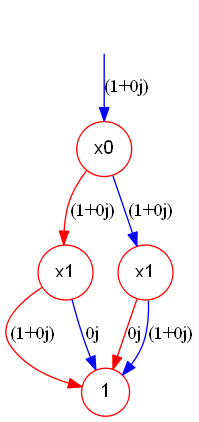

In [2]:
Ini_TDD(['x0','y0','x1','y1'])
U=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
var=[Index('x0'),Index('y0')]
var2=[Index('y0'),Index('x1')]
ts1=Tensor(U,var)
# ts1.tdd().show()
ts2=Tensor(U,var2)
tn=TensorNetwork([ts1,ts2])
tn.cont().show()

In [3]:
path='Benchmarks/'
file_name="3_17_13.qasm"
cir=QuantumCircuit.from_qasm_file(path+file_name)
tn,all_indexs=cir_2_tn(cir)

n=get_real_qubit_num(cir)
input_s=[]
output_s=[]
# input_s=[0]*n
# input_s=[random.randint(0,1) for k in range(n)]
# output_s=[0]*n
# output_s=[random.randint(0,1) for k in range(n)]
if input_s:
    add_inputs(tn,input_s,n)
if output_s:
    add_outputs(tn,output_s,n)
# add_trace_line(tn,n)

0.0638582706451416


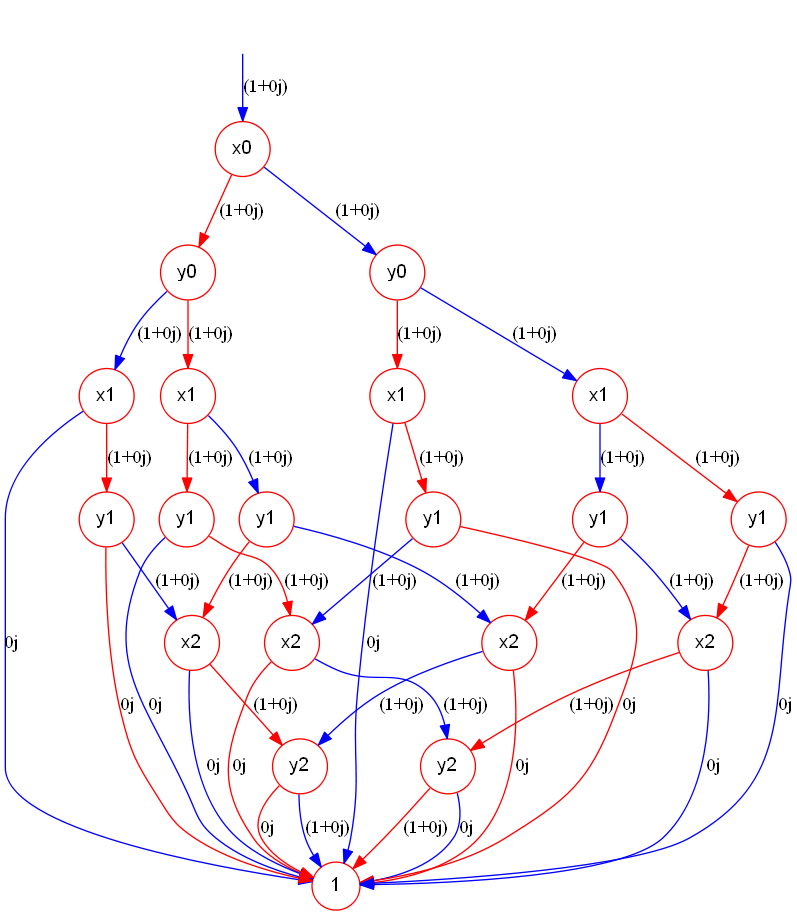

In [4]:
Ini_TDD(index_order=all_indexs)
t_start=time.time()
tdd=tn.cont(optimizer='tree_decomposition')
print(time.time()-t_start)
tdd.show()

True


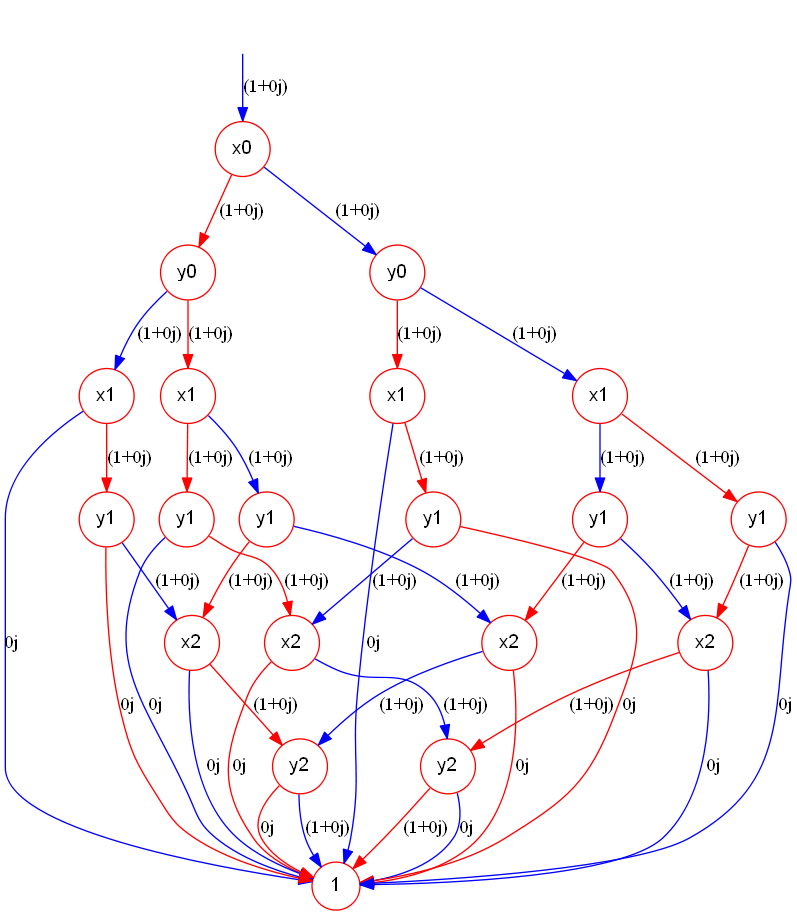

In [5]:
file_name="3_17_13_2.qasm"
cir2=QuantumCircuit.from_qasm_file(path+file_name)
tn2,all_indexs2=cir_2_tn(cir2)
set_index_order(all_indexs2)
tdd2=tn2.cont(optimizer='tree_decomposition')
print(tdd==tdd2)
tdd2.show()

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


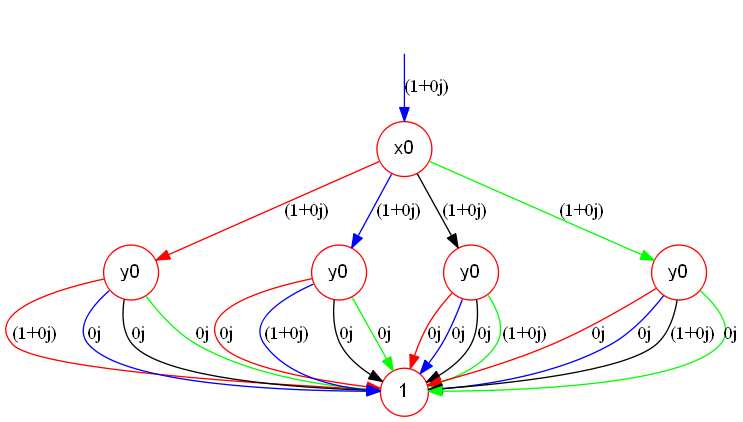

In [6]:
Ini_TDD(['x0','y0','x1','y1'])
U=np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
var=[Index('x0'),Index('y0')]
ts1=Tensor(U,var)
tdd1=ts1.tdd()
print(tdd1.to_array())
tdd1.show()

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


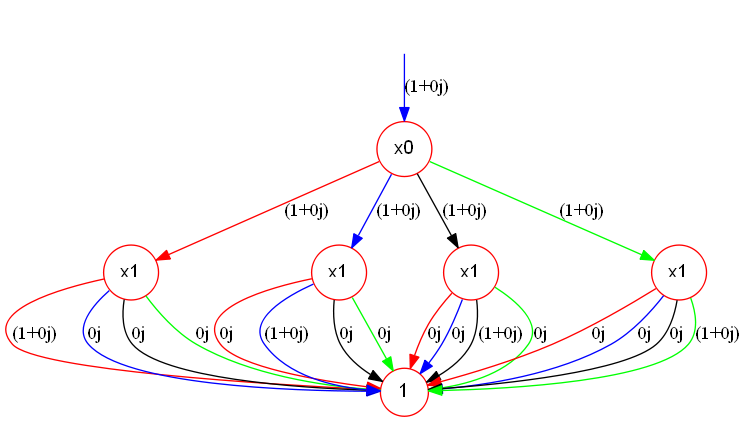

In [7]:
var2=[Index('y0'),Index('x1')]
ts2=Tensor(U,var2)
tn=TensorNetwork([ts1,ts2])
tdd=tn.cont()
print(tdd.to_array())
tdd.show()